In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Link of data we gonna use in our model.

In [26]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

untar_data will download the data for us and add it will return the path it stored the data. 

In [27]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

The path object has in-built function called ls() and it will return the data inside the path. These are what's inside this path, so that's what we just downloaded.

In [28]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

Making different variable for both of those path.

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

get_image_files will just grab an array of all of the image files based on extension in a path.

In [0]:
fnames = get_image_files(path_img)

In [69]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_44.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_81.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_26.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_175.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_49.jpg')]

The regular expression which will extract the label from the image title.

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

ImageDataBunch.from_name_re is going to return a DataBunch object. 

In [53]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,wheaten_terrier,american_bulldog,Abyssinian,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,american_pit_bull_terrier,yorkshire_terrier,american_pit_bull_terrier,newfoundland
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

So you can see data.show_batch can be used to show me some of the contents in my data bunch. 

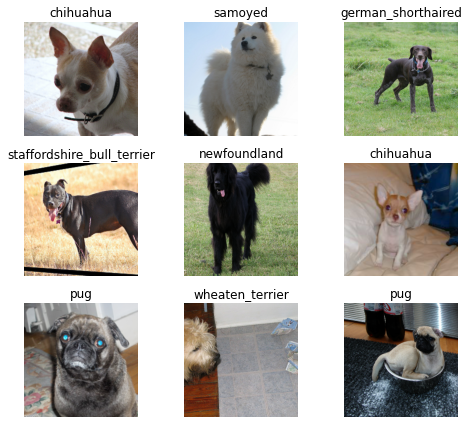

In [54]:
data.show_batch(rows=3, figsize=(7,6))

In [55]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

Now we gonna create a learner. It will just take parameters data, our architechture(I use resnet34). metrics= error_rate gonna print the error rate for us.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

We trained the model with 4 epochs.

In [57]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.524859,0.359919,0.123139,01:38
1,0.628332,0.289588,0.098782,01:38
2,0.413124,0.242010,0.080514,01:38
3,0.294425,0.230045,0.075778,01:39
4,0.239311,0.210434,0.063599,01:38


I am saving this weight so I can do more experiment and come back to this stage again.

In [0]:
learn.save('Stage-1')

To check the error and where the model go wrong, I am going to use this factory method from learner. I am passing learn object.

In [70]:
interp = ClassificationInterpretation.from_learner(learn)

I am plotting top_losses so I am gonna find out where I gone wrong.

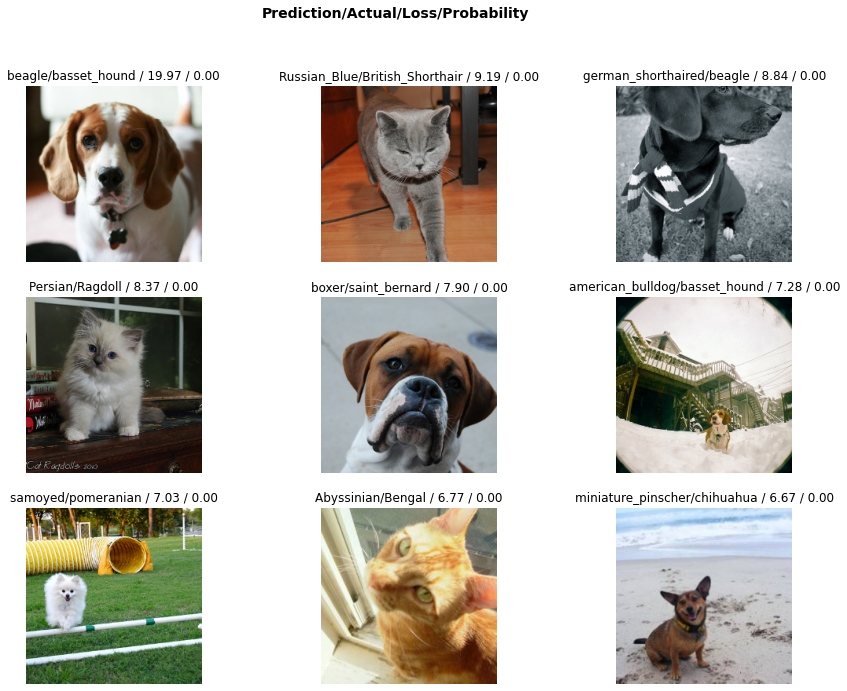

In [71]:
interp.plot_top_losses(9, figsize=(15,11))

To look it into more detail, I am gonna plot confusion matrix. It will graphically show every error on what the model predict and what the actual image was.

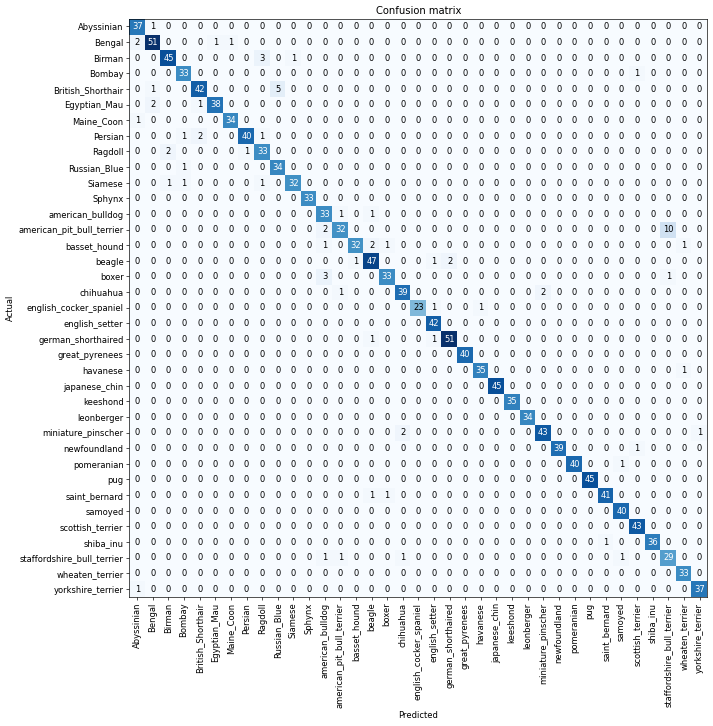

In [76]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

most_confused will simply grab out of confuse matrix and show us combination of predicted which gone wrong most often.

In [73]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Birman', 'Ragdoll', 3),
 ('boxer', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'British_Shorthair', 2),
 ('Ragdoll', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'german_shorthaired', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

Let's run learning rate finder.

In [61]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Plotting learning rate finder.

Text(0.5, 1.0, 'Loss Vs Learning Rate')

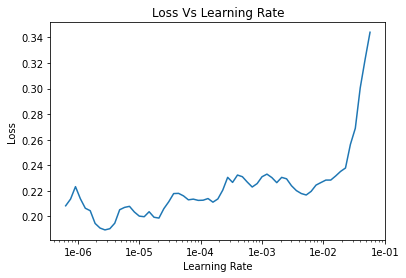

In [62]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

By getting the information from learning rate finder, I tried to pick up things before it started getting worse.

In [66]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.107394,0.215899,0.059540,01:44
1,0.108006,0.212541,0.053451,01:44
2,0.099439,0.212834,0.054804,01:44
3,0.087265,0.214783,0.054804,01:47


In [0]:
learn.save('Stage-2')

Connect Google Drive to Google Colab notebook

In [84]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


I downloaded a image from the internet and I see if it's predicted correctly.

In [0]:
filename = '/content/drive/My Drive/Picture/scottish.jpg'
img = open_image(filename)

My trained model take the picture and see what class it is and it turne out to be right.

In [96]:
pred = learn.predict(img)
print(pred[0])

scottish_terrier
